# KSA206: Polar Observations and Modelling

# Week 7 - Open ocean changes

<div style="float: right; margin-right: 30px; margin-left: 30px; width: 50%; max-width: 500px;">
    <img src="images/sim_schematic_1.png" width="900%" />
</div>

We will start by looking at changes to the temperature, salinity and circulation of the open ocean region, away from the Antarctic margins. Remember the experimental setup that we are working with - look at the figure on the right. We will be working by comparing the last 5 years of the perturbation experiments to the last 5 years of the control simulation. In other words, the last bit of the experiments!

We will use both experiments, and we will look at the anomalies with respect to control. This means we will calculate the difference between the perturbations and control, and this will tell us how much things have *changed*.

Remember that the difference between both perturbation experiments is that in one the authors have added meltwater to represent the melt of the ice sheets. Therefore, the different changes that both perturbations are showing are an *estimate* of what meltwater's effect could be - assuming that there are none non-linear interactions. Feel free to think more about that last sentence!

In [3]:
import cartopy.crs as ccrs
import cartopy.feature as cft
import cmocean as cm
import glob
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [4]:
def stereographic_axis(ax):
    
    ax.set_extent([-180, 180, -80, -50], crs = ccrs.PlateCarree())
    ax.add_feature(cft.NaturalEarthFeature('physical', 'land', '50m',
                                            edgecolor='gainsboro',
                                            facecolor='gainsboro'))
    ax.coastlines(resolution = "110m")
    # Map the plot boundaries to a circle
    theta = np.linspace(0, 2 * np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)

    return ax

## Load data

Let's first load our experiment data and calculate the changes (which we will call anomalies) as explained in the introduction. We will use the following acronym for the experiments:
 - Thermal+wind+precipitation: twp
 - Thermal+wind+precipitation+meltwater: twpm

In [5]:
# Get paths
path_control = glob.glob('data/control*')
path_twpm = glob.glob('data/mw_ssp585*')
path_twp = glob.glob('data/ssp585*')

In [7]:
# Open data
control = xr.open_mfdataset(path_control)
twpm = xr.open_mfdataset(path_twpm)
twp = xr.open_mfdataset(path_twp)

In [8]:
# Calculate anomalies
twpm_anomalies = twpm - control
twp_anomalies = twp - control

## Surface changes

Let's start by looking at temperature and salinity changes at the surface only. Let's do some anomalies maps with two panels

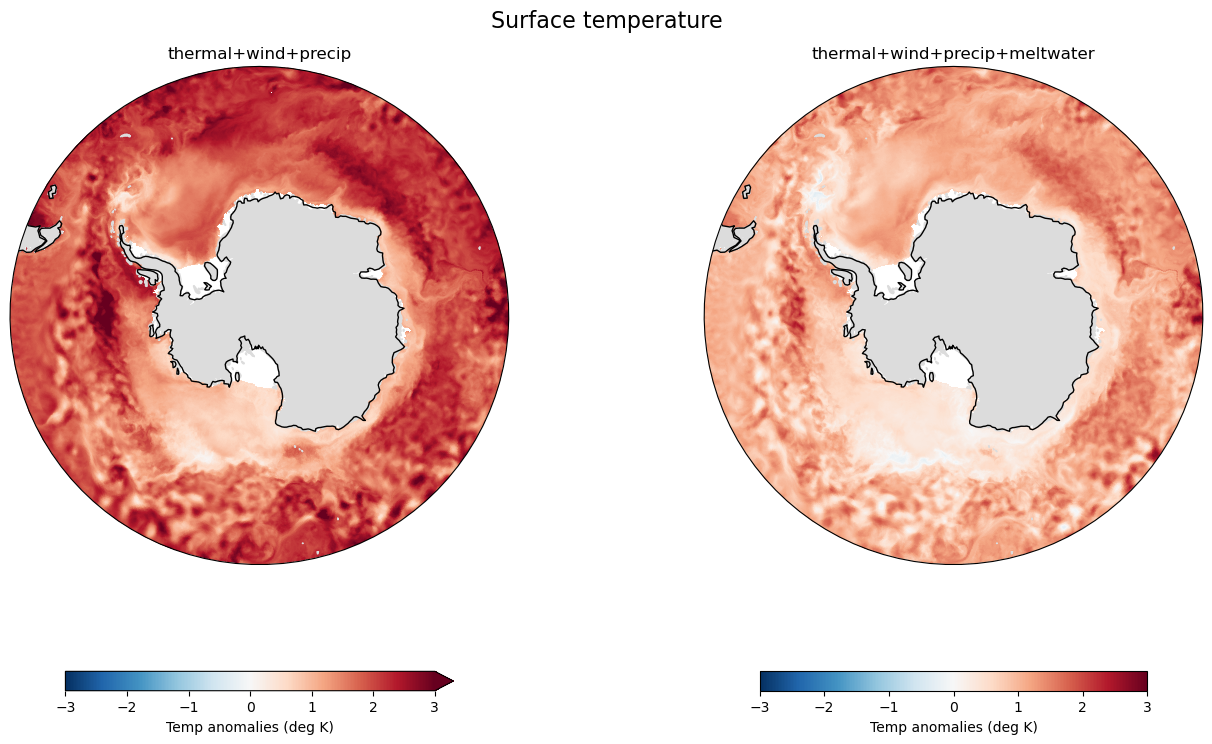

In [11]:
fig = plt.figure(figsize = (15, 8))
axs = [fig.add_subplot(121, projection = ccrs.SouthPolarStereo()),
       fig.add_subplot(122, projection = ccrs.SouthPolarStereo())]
for ax in axs:
    ax = stereographic_axis(ax)

twp_anomalies['temp'].isel(st_ocean = 0).plot(ax = axs[0], vmin = -3, vmax = 3, cmap = 'RdBu_r', transform = ccrs.PlateCarree(),
                                               cbar_kwargs = {'label':'Temp anomalies (deg K)', 'shrink':.5, 'orientation':'horizontal'})
axs[0].set_title('thermal+wind+precip')

twpm_anomalies['temp'].isel(st_ocean = 0).plot(ax = axs[1], vmin = -3, vmax = 3, cmap = 'RdBu_r', transform = ccrs.PlateCarree(),
                                              cbar_kwargs = {'label':'Temp anomalies (deg K)', 'shrink':.5, 'orientation':'horizontal'})
axs[1].set_title('thermal+wind+precip+meltwater');

fig.suptitle('Surface temperature', fontsize = 16);
plt.tight_layout();

Notice how we have put in our colorbar the units in deg K. Remember that the model's temperature comes in Kelvins, but since we are looking at anomalies and the relationship between Kelvin and Celsius is linear, we don't need to convert ☺️ The anomalies in Celsius are the same!

<h4 style="color: red;">Question 1</h4>

Both experiments are showing widespread warming over the entire Southern Ocean - but the experiment with meltwater shows less warming than the other one. Plot the difference between the anomalies of both experiments, which will be an estimate of just the meltwater's contribution. Discuss your findings.

*Answer here*

Now let's look at surface salinities.

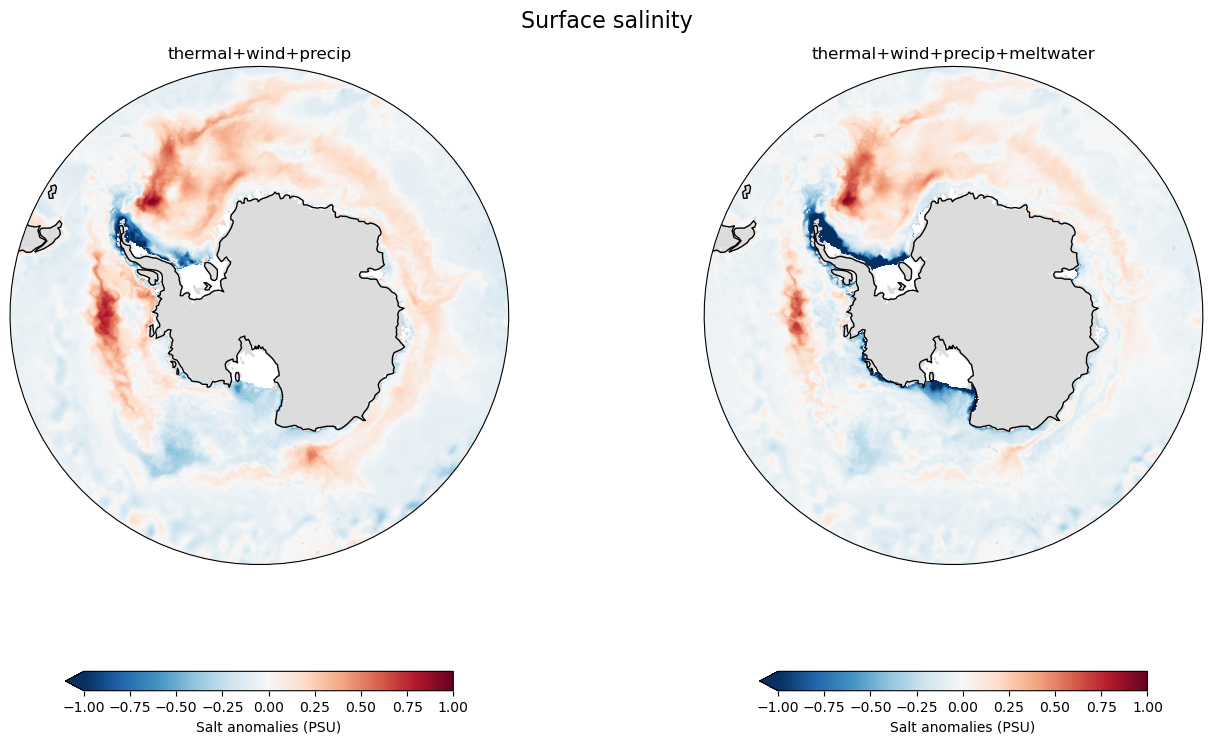

In [12]:
fig = plt.figure(figsize = (15, 8))
axs = [fig.add_subplot(121, projection = ccrs.SouthPolarStereo()),
       fig.add_subplot(122, projection = ccrs.SouthPolarStereo())]
for ax in axs:
    ax = stereographic_axis(ax)

twp_anomalies['salt'].isel(st_ocean = 0).plot(ax = axs[0], vmin = -1, vmax = 1, cmap = 'RdBu_r', transform = ccrs.PlateCarree(),
                                                      cbar_kwargs = {'label':'Salt anomalies (PSU)', 'shrink':.5, 'orientation':'horizontal'})
axs[0].set_title('thermal+wind+precip')

twpm_anomalies['salt'].isel(st_ocean = 0).plot(ax = axs[1], vmin = -1, vmax = 1, cmap = 'RdBu_r', transform = ccrs.PlateCarree(),
                                                    cbar_kwargs = {'label':'Salt anomalies (PSU)', 'shrink':.5, 'orientation':'horizontal'})
axs[1].set_title('thermal+wind+precip+meltwater');

fig.suptitle('Surface salinity', fontsize = 16);
plt.tight_layout()

<h4 style="color: red;">Question 2</h4>

Where do you see the most differences between these experiments? Do you find that reasonable?

*Answer here*

## Bottom changes

Let's look now at changes at the bottom. We will use code we have written already for the notebook `2_Calculating_trends.ipynb` from Week 5! If you need, revisit that section of the notebook to remember why we are extracting the bottom values like this.

In [13]:
# Create a mask with zeros where we have nans (land and below the bottom) and 1s everywhere else
mask = xr.where(np.isnan(control['temp']), 0, 1)
# Sum cumulatively in the vertical
mask = mask.cumsum('st_ocean')
# Get the index for maxiumum value, which will be the last depth below the bottom
bottom_level = mask.argmax('st_ocean')

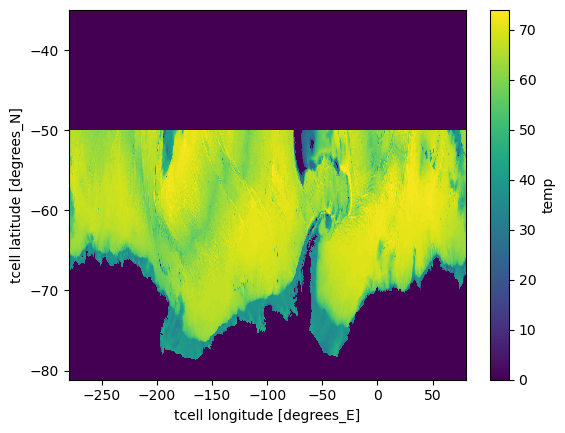

In [14]:
# Quick plot to check - it should be very similar to the bathymetry
bottom_level.plot();

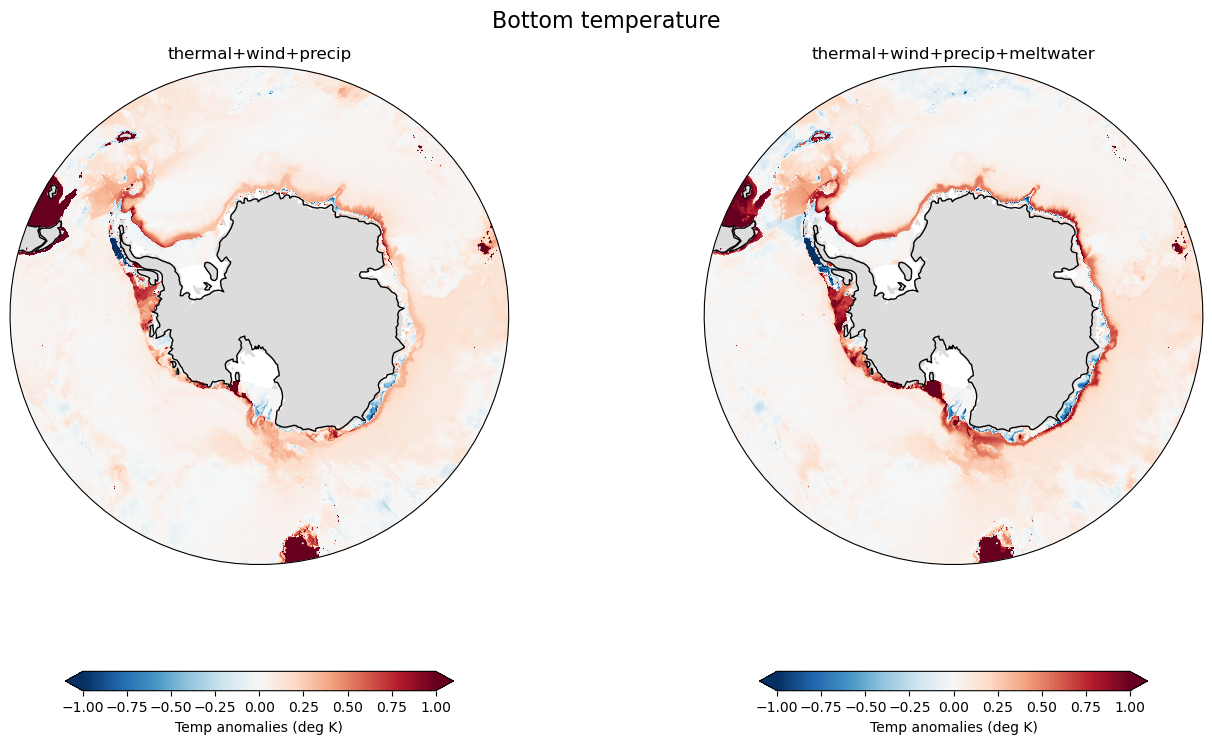

In [15]:
fig = plt.figure(figsize = (15, 8))
axs = [fig.add_subplot(121, projection = ccrs.SouthPolarStereo()),
       fig.add_subplot(122, projection = ccrs.SouthPolarStereo())]
for ax in axs:
    ax = stereographic_axis(ax)

# Note how we have to add .load() to bottom levels - without loading into memory, this will fail!
twp_anomalies['temp'].isel(st_ocean = bottom_level.load()).plot(ax = axs[0], vmin = -1, vmax = 1, cmap = 'RdBu_r', transform = ccrs.PlateCarree(),
                                                                 cbar_kwargs = {'label':'Temp anomalies (deg K)', 'shrink':.5, 'orientation':'horizontal'})
axs[0].set_title('thermal+wind+precip')

twpm_anomalies['temp'].isel(st_ocean = bottom_level.load()).plot(ax = axs[1], vmin = -1, vmax = 1, cmap = 'RdBu_r', transform = ccrs.PlateCarree(),
                                                               cbar_kwargs = {'label':'Temp anomalies (deg K)', 'shrink':.5, 'orientation':'horizontal'})
axs[1].set_title('thermal+wind+precip+meltwater');

fig.suptitle('Bottom temperature', fontsize = 16);
plt.tight_layout()

Notice how there is a lot of warming west of the Antarctic Peninsula in the Amundsen Bellinghausen Sea in both experiments. This is one of the most vulnerable regions of the Antarctic margins, where we are currently observing ice sheet melt, and where we expect a lot of the future melt to happen. 

But there is also weak, but generalised warming almost everywhere at the bottom - to assess the significance of these changes (i.e. if statistically the perturbations are different than the control) would require a bit of extra work that we are not going to do in this course.

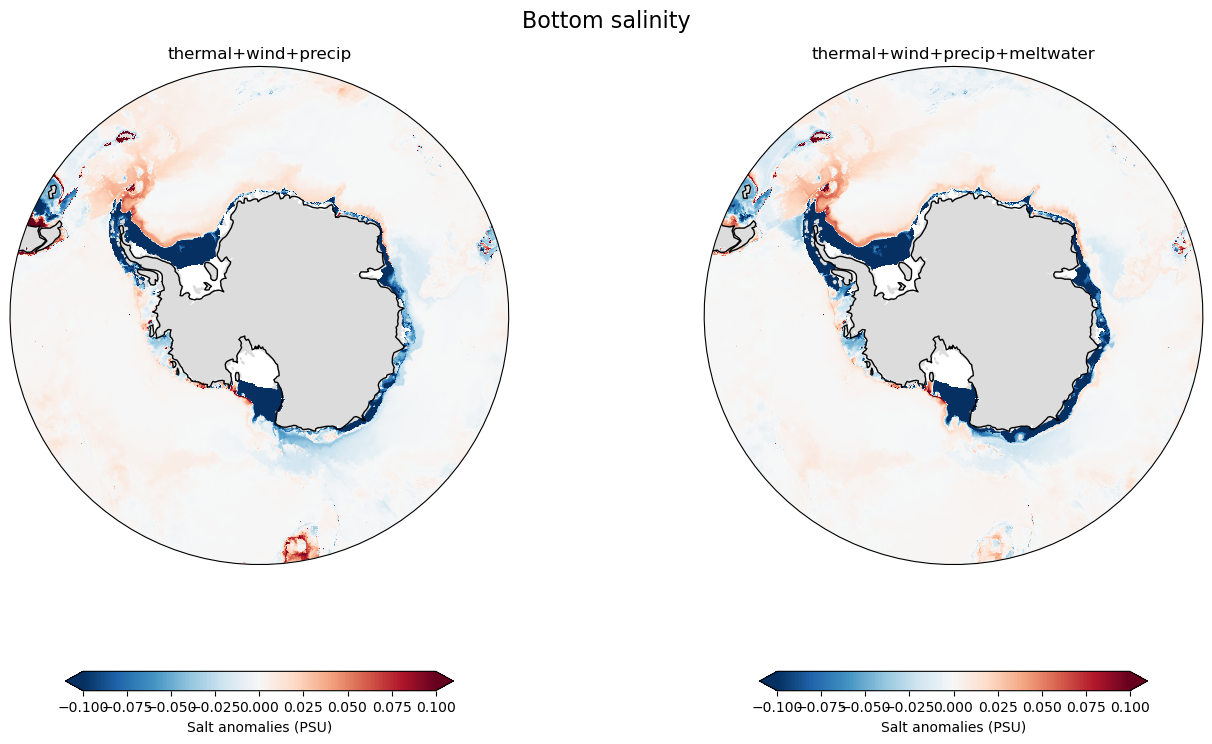

In [16]:
fig = plt.figure(figsize = (15, 8))
axs = [fig.add_subplot(121, projection = ccrs.SouthPolarStereo()),
       fig.add_subplot(122, projection = ccrs.SouthPolarStereo())]
for ax in axs:
    ax = stereographic_axis(ax)

twp_anomalies['salt'].isel(st_ocean = bottom_level.load()).plot(ax = axs[0], vmin = -.1, vmax = .1, cmap = 'RdBu_r', transform = ccrs.PlateCarree(),
                                                                 cbar_kwargs = {'label':'Salt anomalies (PSU)', 'shrink':.5, 'orientation':'horizontal'})
axs[0].set_title('thermal+wind+precip')

twpm_anomalies['salt'].isel(st_ocean = bottom_level.load()).plot(ax = axs[1], vmin = -.1, vmax = .1, cmap = 'RdBu_r', transform = ccrs.PlateCarree(),
                                                               cbar_kwargs = {'label':'Salt anomalies (PSU)', 'shrink':.5, 'orientation':'horizontal'})
axs[1].set_title('thermal+wind+precip+meltwater');

fig.suptitle('Bottom salinity', fontsize = 16);
plt.tight_layout()

## Circulation changes

Let's use what the calculations we developed last week for the streamfunction and the Drake Passage transport to look at changes to the circulation in these experiments. 

Let's begin by calculating the barotropic streamfunction from the transport variable - `tx_trans_int_z`.

This time we will use the actual fields, not the anomalies and we will plot the control streamfunction as reference. This is because anomalies of the streamfunction can be hard to interpret. While for temperature positive will mean warming and negative cooling everytime, the sign of the streamfuncion anomalies *depend on the sign of the control*. They can mean shifts in the position of a current as well - so just to be safe we will look at the actual fields.

In [66]:
psi_control = control['tx_trans_int_z'].cumsum('yt_ocean')/1035/1e6
psi_th_w_precip = no_meltwater_changes['tx_trans_int_z'].cumsum('yt_ocean')/1035/1e6
psi_everything = everything_changes['tx_trans_int_z'].cumsum('yt_ocean')/1035/1e6

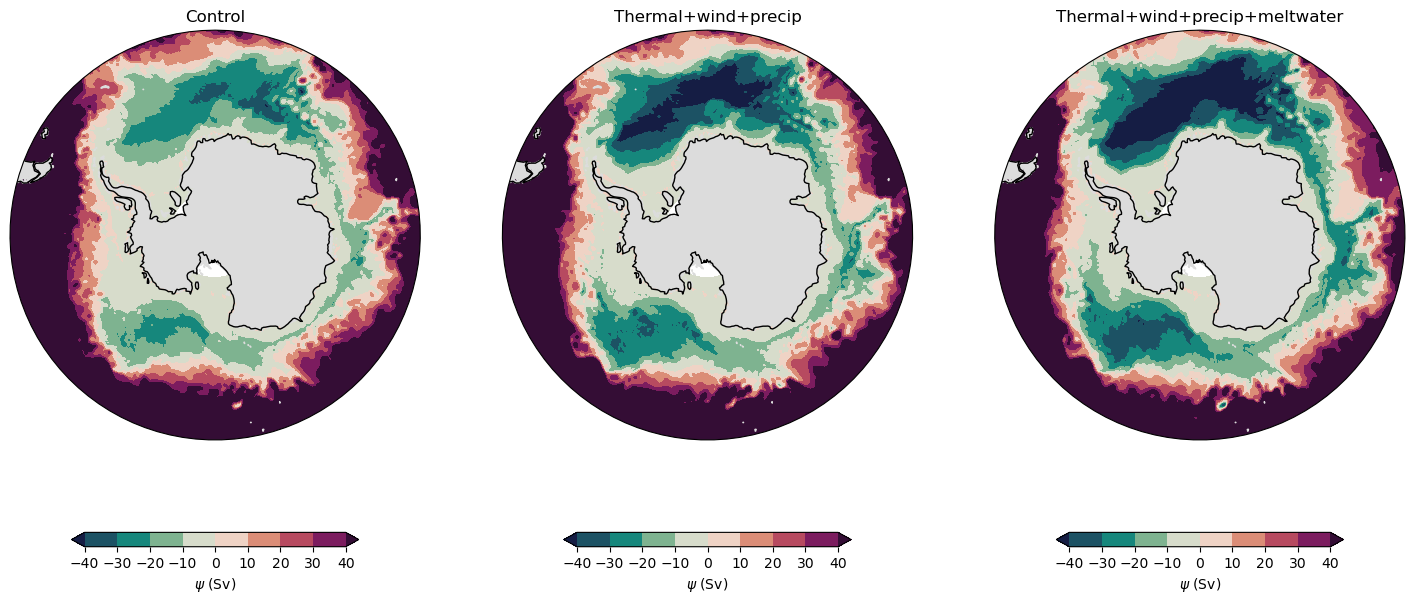

In [86]:
fig = plt.figure(figsize = (18, 8))
axs = [fig.add_subplot(131, projection = ccrs.SouthPolarStereo()),
       fig.add_subplot(132, projection = ccrs.SouthPolarStereo()),
       fig.add_subplot(133, projection = ccrs.SouthPolarStereo())]
for ax in axs:
    ax = stereographic_axis(ax)

psi_control.plot.contourf(ax = axs[0], vmin = -40, vmax = 40, levels = 9, cmap = cm.cm.curl, transform = ccrs.PlateCarree(),
                          cbar_kwargs = {'label':'$\\psi$ (Sv)', 'shrink':.7, 'orientation':'horizontal'})
axs[0].set_title('Control')
psi_th_w_precip.plot.contourf(ax = axs[1], vmin = -40, vmax = 40, levels = 9, cmap = cm.cm.curl, transform = ccrs.PlateCarree(),
                          cbar_kwargs = {'label':'$\\psi$ (Sv)', 'shrink':.7, 'orientation':'horizontal'})
axs[1].set_title('Thermal+wind+precip')
psi_everything.plot.contourf(ax = axs[2], vmin = -40, vmax = 40, levels = 9, cmap = cm.cm.curl, transform = ccrs.PlateCarree(),
                          cbar_kwargs = {'label':'$\\psi$ (Sv)', 'shrink':.7, 'orientation':'horizontal'})
axs[2].set_title('Thermal+wind+precip+meltwater');

<h4 style="color: red;">Question 3</h4>

What has happened with the circulation of the subpolar gyres? Why do you think that is?

*Answer here*

The plots above are great to look at the subpolar gyres, but not if we want to look at changes in the Antarctic Circumpolar Current. For that, let's zoom in the Drake Passage, and calculate it's transport using code from the `3_Transport_streamfunction.ipynb` notebook from Week 6. Revisit that notebook if you want to check where the code came from. 

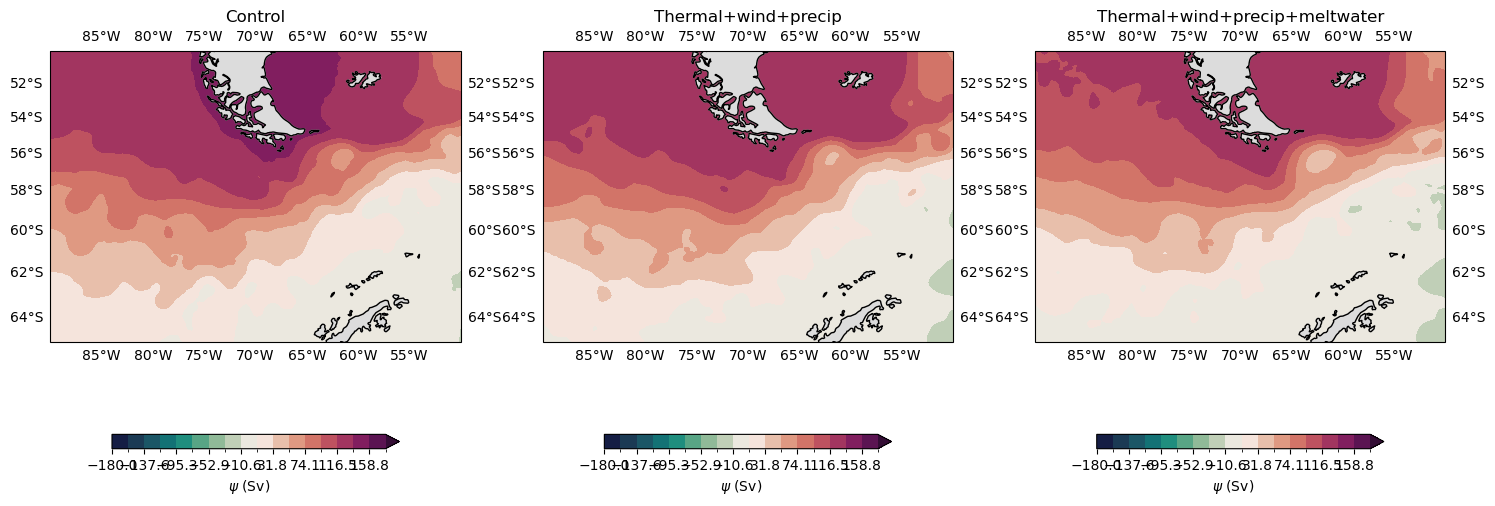

In [85]:
fig = plt.figure(figsize = (18, 8))
axs = [fig.add_subplot(131, projection = ccrs.Mercator(central_longitude = -70)),
       fig.add_subplot(132, projection = ccrs.Mercator(central_longitude = -70)),
       fig.add_subplot(133, projection = ccrs.Mercator(central_longitude = -70))]
for ax in axs:
    ax.set_extent([-90, -50, -65, -50], crs = ccrs.PlateCarree())
    ax.add_feature(cft.NaturalEarthFeature('physical', 'land', '50m',
                                            edgecolor='gainsboro',
                                            facecolor='gainsboro'))
    ax.coastlines(resolution = "50m")
    gl = ax.gridlines(draw_labels = True, linewidth = 0)
    gl.xformatter = ccrs.cartopy.mpl.ticker.LongitudeFormatter()
    gl.yformatter = ccrs.cartopy.mpl.ticker.LatitudeFormatter()
    
psi_control.plot.contourf(ax = axs[0], vmin = -180, vmax = 180, levels = 18, cmap = cm.cm.curl, transform = ccrs.PlateCarree(),
                          cbar_kwargs = {'label':'$\\psi$ (Sv)', 'shrink':.7, 'orientation':'horizontal'})
axs[0].set_title('Control')
psi_th_w_precip.plot.contourf(ax = axs[1], vmin = -180, vmax = 180, levels = 18, cmap = cm.cm.curl, transform = ccrs.PlateCarree(),
                          cbar_kwargs = {'label':'$\\psi$ (Sv)', 'shrink':.7, 'orientation':'horizontal'})
axs[1].set_title('Thermal+wind+precip')
psi_everything.plot.contourf(ax = axs[2], vmin = -180, vmax = 180, levels = 18, cmap = cm.cm.curl, transform = ccrs.PlateCarree(),
                          cbar_kwargs = {'label':'$\\psi$ (Sv)', 'shrink':.7, 'orientation':'horizontal'})
axs[2].set_title('Thermal+wind+precip+meltwater');

<h4 style="color: red;">Question 4</h4>

Looking at the maps, before you calculate the Drake Passage transport, what do you think happened in the perturbations? Weaker ACC strength or stronger? Explain your reasoning.

*Answer here*

Now let's calculate the actual transport:

In [80]:
ψ_south_america = psi_control.sel(xu_ocean = -68, yt_ocean = -55, method = 'nearest')
ψ_antarctic_pen = psi_control.sel(xu_ocean = -62, yt_ocean = -64, method = 'nearest')

DP_control = ψ_south_america - ψ_antarctic_pen

ψ_south_america = psi_th_w_precip.sel(xu_ocean = -68, yt_ocean = -55, method = 'nearest')
ψ_antarctic_pen = psi_th_w_precip.sel(xu_ocean = -62, yt_ocean = -64, method = 'nearest')

DP_th_w_precip = ψ_south_america - ψ_antarctic_pen

ψ_south_america = psi_everything.sel(xu_ocean = -68, yt_ocean = -55, method = 'nearest')
ψ_antarctic_pen = psi_everything.sel(xu_ocean = -62, yt_ocean = -64, method = 'nearest')

DP_everything = ψ_south_america - ψ_antarctic_pen

In [83]:
print('DP transport in control: '+str(np.round(DP_control.values, 3)))
print('DP transport in thermal+wind+precip: '+str(np.round(DP_th_w_precip.values, 3)))
print('DP transport in thermal+wind+precip+meltwater: '+str(np.round(DP_everything.values, 3)))

DP transport in control: 138.245
DP transport in thermal+wind+precip: 129.432
DP transport in thermal+wind+precip+meltwater: 121.532


In [2]:
17/138

0.12318840579710146

The Drake Passage transport has weakened in all of these perturbation experiments.

<h4 style="color: red;">Question 5</h4>

For the Drake Passage transport, what forcing do you think had a larger effect? Meltwater, or thermal+wind+precip?

*Answer here*